In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from sklearn.cluster import KMeans

In [24]:
data = pd.read_csv('5.1 Categorical.csv.csv')
data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


In [17]:
data.describe()

,Longitude,Latitude
count,241.000000,241.000000
mean,14.215380,17.169377
std,72.013654,26.554014
min,-177.348348,-80.508579
25%,-36.433184,1.358761
50%,18.644925,17.277500
75%,47.587005,39.115541
max,171.484924,74.710513


In [19]:
data.isnull().sum()

name         0
Longitude    0
Latitude     0
continent    0
dtype: int64

In [ ]:
data.

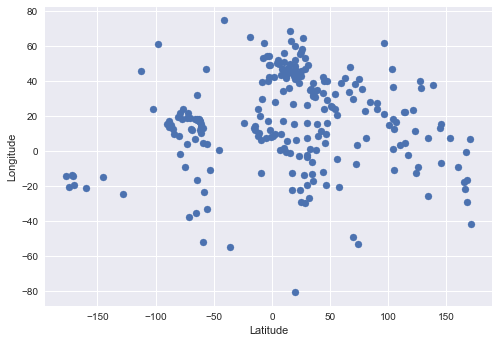

In [7]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [9]:
x = data.iloc[:,1:3]
x.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


In [31]:
kmeans = KMeans(5)
kmeans = kmeans.fit(x)

In [32]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
identified_cluster = kmeans.fit_predict(x)

In [34]:
identified_cluster

array([1, 4, 4, 1, 2, 2, 2, 4, 1, 2, 3, 4, 0, 4, 1, 0, 2, 2, 4, 2, 2, 2,
       0, 2, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 4, 4, 2, 1, 0, 2, 4,
       4, 4, 3, 1, 4, 2, 1, 1, 1, 1, 2, 2, 2, 2, 4, 1, 2, 1, 2, 1, 2, 4,
       2, 2, 4, 2, 0, 1, 2, 2, 0, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 1, 2, 1,
       0, 1, 0, 4, 1, 2, 1, 2, 0, 2, 4, 0, 4, 2, 4, 4, 2, 2, 2, 1, 2, 2,
       0, 4, 4, 4, 4, 0, 1, 1, 0, 2, 4, 0, 2, 2, 2, 1, 2, 4, 4, 2, 2, 2,
       0, 1, 2, 2, 2, 4, 4, 1, 0, 2, 2, 2, 0, 2, 0, 0, 4, 2, 1, 4, 4, 0,
       4, 0, 2, 0, 2, 1, 3, 2, 2, 0, 0, 0, 4, 4, 1, 3, 1, 0, 0, 0, 2, 1,
       0, 2, 1, 2, 3, 4, 2, 0, 4, 2, 4, 4, 4, 2, 0, 1, 4, 0, 2, 1, 2, 4,
       4, 1, 2, 4, 1, 2, 2, 2, 4, 1, 4, 2, 1, 2, 2, 0, 4, 4, 0, 3, 1, 2,
       2, 0, 4, 4, 2, 1, 1, 4, 2, 1, 1, 1, 1, 0, 0, 3, 3, 4, 4, 4, 4])

In [35]:
data_with_cluster = data.copy()
data_with_cluster['Clusters'] = identified_cluster
data_with_cluster.head()

,name,Longitude,Latitude,continent,Clusters
0,Aruba,-69.982677,12.520880,North America,1
1,Afghanistan,66.004734,33.835231,Asia,4
2,Angola,17.537368,-12.293361,Africa,4
3,Anguilla,-63.064989,18.223959,North America,1
4,Albania,20.049834,41.142450,Europe,2


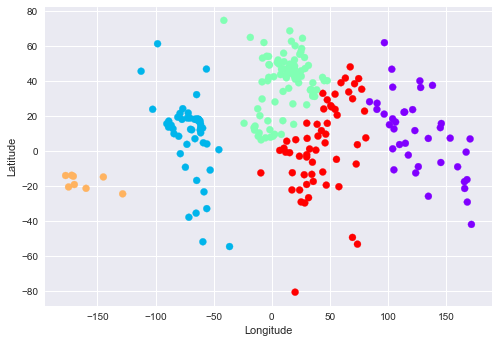

In [36]:
plt.scatter(data_with_cluster['Longitude'], data_with_cluster['Latitude'], c=data_with_cluster['Clusters'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Selecting the number of Clusters

# WCSS

In [37]:
kmeans.inertia_

192356.4800188937

In [41]:
wcss = []

for i in range (1,20):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
    
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.522370559,
 256573.08675934302,
 192194.9829002524,
 152164.15221066383,
 126891.86138697219,
 102891.39703473676,
 84945.19461239543,
 76439.49644818818,
 70570.83957132562,
 64797.224023192444,
 59476.66254669754,
 55872.70121071697,
 51016.855160313295,
 47818.58057561035,
 44456.513742647774,
 41375.59190858115,
 39201.02061805181]

# The Elbow Method

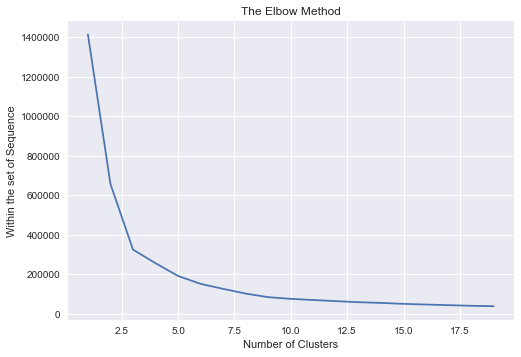

In [43]:
number_of_clusters = range(1, 20)
plt.plot(number_of_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within the set of Sequence')
plt.show()